Testing out a new intra-night metric:

compute the median gap between observations within a night (only including nights that have multiple observations).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'intraDay'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
slicer=slicers.HealpixSlicer()
metric = metrics.IntraNightGapsMetric()
plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':1.2, 'xMin':0,'xMax':1.2}
sql = 'filter = "r"'

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['opsim_Median_Intra-Night_Gap_r_HEAL']
Completed metric generation.
Running:  ['opsim_Median_Intra-Night_Gap_dithered_HEAL']
Completed metric generation.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "r"' should be explicitly declared as text('filter = "r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 241 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
monopole: 0.372548  dipole: lon: 79.795, lat: 66.9101, amp: 0.0645655
monopole: 0.370499  dipole: lon: 82.2054, lat: 71.1832, amp: 0.0669124
Plotting complete.


Optimal bin calculation tried to make 2463 bins, returning 200


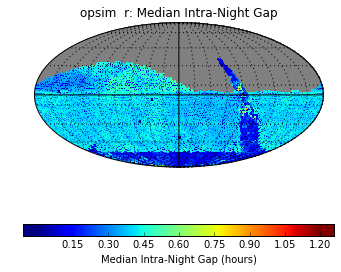

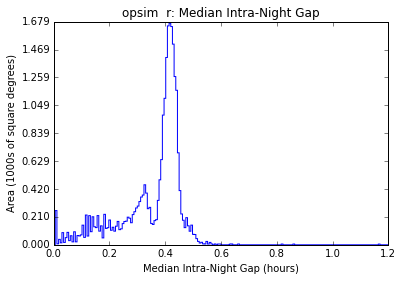

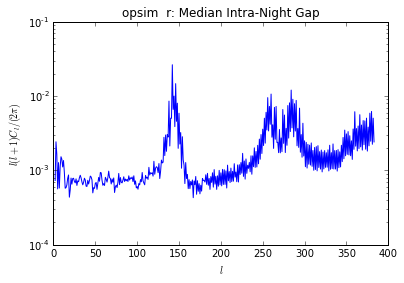

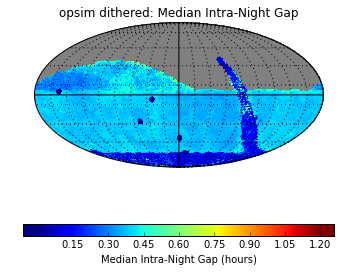

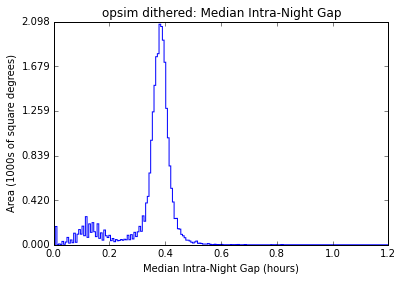

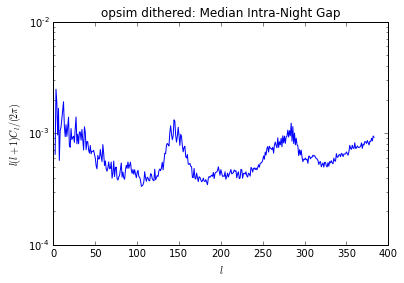

In [4]:
bundle1 = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
bundle2 = metricBundles.MetricBundle(metric,slicer,sql, metadata='dithered', plotDict=plotDict)
bundleDict = metricBundles.makeBundlesDictFromList([bundle1,bundle2])
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)